-------------------------------------------------------
# **Question 4: IMAGE RECONSTRUCTION (13  points)**
-------------------------------------------------------

## Description
__For this question you need to have OpenCV installed in your Python enviroment.__ 

An image sensor is a sensor that detects and conveys information used to form an image. Suppose that we have a sensor with $N$ pixels. Each pixel can be modelled as a random variable, $X_1, .. , X_N$. Physicists have shown that a Poisson distribution can model the arrival of the photons. That is, if $x_i \in \mathbb{Z}$ is $i$th observed pixel value, then

$$P(X_i=x_i) = \lambda^{x_i} \frac{e^{- \lambda}}{x_i!} \: \text{ for } 1 \leq i \leq N,$$

where $\lambda$, the parameter of the Poisson distribution, is the intensity of the pattern.

A single-photon image sensor is slightly more basic sensor. It does not report $X_i$ but only its truncated version $Y_i$.
For example, it can report 

$$Y_i=
\begin{cases}
0, & \text{ if } X_i = 0,\\
1, & \text{ if } X_i \geq 1.\\
\end{cases}$$

This particular type of sensors is known as a one-bit single-photon image sensor.

<center>

<img src="Single-Photon-Image-Sensor.png" width="850px"> 

</center>
    
A one-bit single-photon image sensor captures an image with binary bits.
It reports a ''1'' when the number of photons exceeds a certain threshold, and ''0'' otherwise.

The goal of this exercise is to estimate the underlying image from the measurements of a one-bit single-photon image sensor. In particular, we are going to use the maximum likelihood estimator to find the estimate the value of $\lambda$ for each pixel based on 100 measurements of a one-bit single-photon image sensor $\vec y_1,..., \vec y_{100}$.

## Questions 

a. Display the first 10 observations (i.e., one-bit single-photon image sensor measurents) in one subfigure.

b. Derive by hand the likelihood function $p(\lambda; y_1,..., y_{100})$ for a particular pixel. 

c. Derive by hand the corresponding log-likelihood function $\log p(\lambda; y_1,..., y_{100})$. 

d. Derive by hand the maximum likelihood estimate of $\lambda$ for a particular pixel. 

e. Use the expression derived in part d to estimate the underlying image. Display the estimated image.

f. Compute the root mean square error (RMSE) to measure the quality of the estimate.

## Code

### Preliminaries: imitating one-bit single-photon image sensor

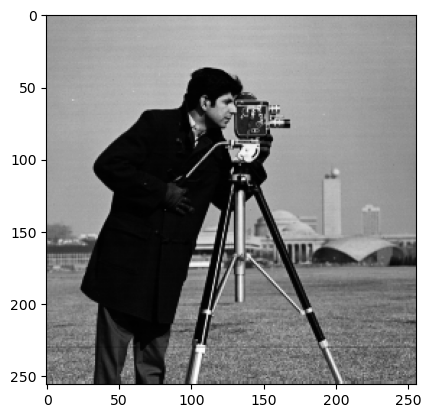

In [60]:
# This question requires OpenCV library. Make sure it is installed!
# Do not modify!
import cv2 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(32)

# Read the provided image
lambd = cv2.imread('./cameraman.tif')    

# Convert it to gray scale
lambd = cv2.cvtColor(lambd, cv2.COLOR_BGR2GRAY)/255 # gray scale

# Display the original image in gray scale
plt.figure()
plt.imshow(lambd, cmap='gray')
plt.show()

# Repeat the gray scale image T times
T = 100 # number of measuraments/observations
lambdT = np.repeat(lambd[:, :, np.newaxis], T, axis=2)  

# Use Poisson distribution to create T measurements of an image sensor
x = stats.poisson.rvs(lambdT)  

# Truncate x to create a one-bit single-photon image sensor measurents
y = (x >= 1).astype(float)        

### Part a

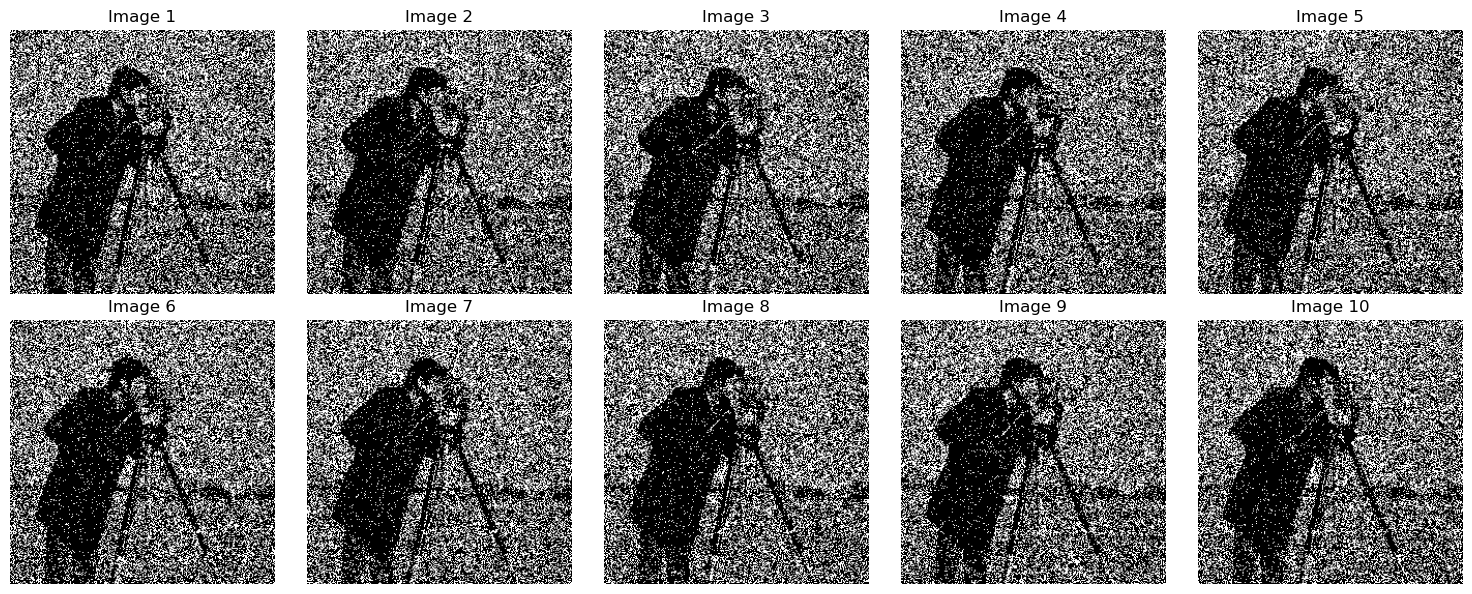

In [49]:
# Your code
# Create a figure with 10 subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the first 10 images
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(y[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {i+1}')

# Display the figure
plt.tight_layout()
plt.show()

### Part b

Here, we first need to express the probability distribution of $Y_i$ using $\lambda$.

$Y_i$ is a binary random variable with the following probability distribution:

$$P(Y_i = 0) = P(X_i = 0) = e^{-\lambda},$$
$$P(Y_i = 1) = P(X_i \neq 0) = 1 -e^{-\lambda}.$$

That is, $Y_i$ is a Bernoulli random variable with parameter $1 -e^{-\lambda}$, the probability of 1. 

Since $y_i$ is binary, the likelihood function becomes

$$p(\lambda; y_1,..., y_{100}) = \prod_{i=1}^{100} (1 -e^{-\lambda})^{y_i} (e^{-\lambda})^{1-y_i}.$$

### Part c

\begin{align*}
\log p(\lambda; y_1,..., y_{100}) & = \log \prod_{i=1}^{100} (1 -e^{-\lambda})^{y_i} (e^{-\lambda})^{1-y_i} \\
& = \sum_{i=1}^{100} \log \left((1 -e^{-\lambda})^{y_i} (e^{-\lambda})^{1-y_i}\right) \\
& = \sum_{i=1}^{100} \left({y_i} \log(1 -e^{-\lambda}) - \lambda(1-y_i)\right)\\
& = \log (1 -e^{-\lambda}) \sum_{i=1}^{100} y_i - 100\lambda + \lambda \sum_{i=1}^{100} y_i.
\end{align*}

### Part d

First we take the derivative of the log=likelihood function w.r.t. the parameter.
\begin{align}
\frac{\partial }{\partial \lambda} \log p(\lambda; y_1,..., y_{100}) &= \frac{\partial }{\partial \lambda} \log (1 -e^{-\lambda}) \sum_{i=1}^{100} y_i - 100\lambda + \lambda \sum_{i=1}^{100} y_i \\
&= \frac{\sum_{i=1}^{100} y_i}{1 -e^{-\lambda}}e^{-\lambda} - 100 + \sum_{i=1}^{100} y_i. 
\end{align}

Next, we set the derivative equal to zero.
$$\frac{\sum_{i=1}^{100} y_i}{1 -e^{-\lambda}}e^{-\lambda} - 100 + \sum_{i=1}^{100} y_i = 0.$$
Equivalently, 
$$\frac{\sum_{i=1}^{100} y_i}{1 -e^{-\lambda}} = \frac{100 - \sum_{i=1}^{100} y_i}{e^{-\lambda}}$$
or
$$e^{-\lambda} 100 = 100 - \sum_{i=1}^{100} y_i.$$
Thus, $\hat{\lambda} = 1 - \frac{1}{100}\sum_{i=1}^{100} y_i$.

### Part e

For actual images, you can extrapolate the idea from $y_i$ to $y_{k,l,i}$, which represebts pixel $(k,l)$ from the $i$th observation. Defining $\mathbf{y}_i \in \mathbb{R}^{N \times N}$ as the $i$th observation, we can use $T$ observations to provide the estimate of the image, $\hat{\boldsymbol{\lambda}} \in \mathbb{R}^{N \times N}$.

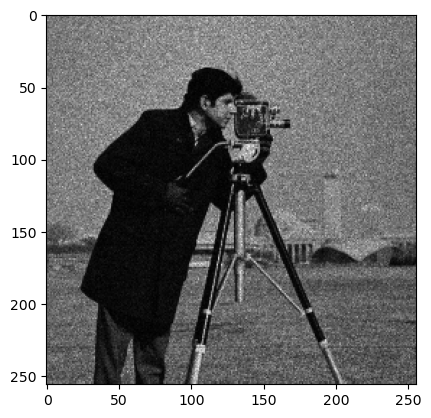

In [58]:
# Your code
# Define the MLE
lambdhat = -np.log(1-np.mean(y, axis=2))             

# Display the estimated image
plt.figure()
plt.imshow(lambdhat, cmap='gray')
plt.show()

### Part f

The RMSE can be used to measure the differences between the true and estimated values. It is defined as $$\sqrt{\frac{\sum_{i=1}^n (\hat{z}_i-z_i)^2}{n}},$$
where $z_i$ is a true value, $\hat{z}_i$ is an estimated value, and $n$ is the total number of values. 

In [63]:
# Your code
def calculate_rmse(l, l_hat):
    return np.sqrt(((l - l_hat)**2).mean())

calculate_rmse(lambd, lambdhat)

0.08074572316252387